In [19]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from tqdm import tqdm

In [20]:
files = []
df = []
lbl = []

for filename in tqdm(os.listdir("Data/")):
    image = cv2.imread('Data/'+filename,0)
    h, w = image.shape
    r = 28 / w
    dim = (28, int(r * h))
    image = cv2.resize(image, dim)
    image = image.reshape((1, 784)).astype('float32')
    df.append(image)
    lbl.append(int(filename.split('-')[0].split('img')[1])-1)

100%|██████████| 10160/10160 [00:02<00:00, 4274.19it/s]


In [21]:
df = np.array(df)
lbl = np.array(lbl)
df = df.reshape((df.shape[0], 784)).astype('float32')
indices = np.random.permutation(df.shape[0])
np.take(df, indices, axis=0, out=df)
np.take(lbl, indices, axis=0, out=lbl)

b = int(df.shape[0] * 0.8)
xtrain = df[:b]
ytrain = lbl[:b]
xtest = df[b:]
ytest = lbl[b:]

In [22]:
df[0].shape

(784,)

In [23]:
num_pixels = 784
num_classes = 10

xtrain = xtrain / 255
xtest = xtest / 255


In [24]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

l0 = tf.keras.layers.Dense(num_pixels, input_dim=num_pixels, activation='relu', kernel_initializer='normal')
l1 = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_initializer='normal')
model = tf.keras.Sequential([l0, l1])

history = model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=10, verbose=2)

Epoch 1/10


813/813 - 5s - 7ms/step - accuracy: 0.8516 - loss: 0.5304 - val_accuracy: 0.8898 - val_loss: 0.3677
Epoch 2/10
813/813 - 4s - 5ms/step - accuracy: 0.9176 - loss: 0.2708 - val_accuracy: 0.8967 - val_loss: 0.3570
Epoch 3/10
813/813 - 4s - 5ms/step - accuracy: 0.9374 - loss: 0.2015 - val_accuracy: 0.9134 - val_loss: 0.2798
Epoch 4/10
813/813 - 4s - 4ms/step - accuracy: 0.9371 - loss: 0.1907 - val_accuracy: 0.9390 - val_loss: 0.2017
Epoch 5/10
813/813 - 4s - 4ms/step - accuracy: 0.9476 - loss: 0.1633 - val_accuracy: 0.9198 - val_loss: 0.2477
Epoch 6/10
813/813 - 4s - 5ms/step - accuracy: 0.9542 - loss: 0.1397 - val_accuracy: 0.9390 - val_loss: 0.1675
Epoch 7/10
813/813 - 4s - 5ms/step - accuracy: 0.9550 - loss: 0.1364 - val_accuracy: 0.9454 - val_loss: 0.1868
Epoch 8/10
813/813 - 4s - 5ms/step - accuracy: 0.9625 - loss: 0.1152 - val_accuracy: 0.9592 - val_loss: 0.1207
Epoch 9/10
813/813 - 4s - 5ms/step - accuracy: 0.9632 - loss: 0.1104 - val_accuracy: 0.9390 - val_loss: 0.1780
Epoch 10/10


In [27]:
model.evaluate(xtest, ytest, verbose=0)

[0.15205217897891998, 0.9547244310379028]

In [29]:
model.save("/Model_saves/first.h5")

In [32]:
model.save("/Model_saves/first.keras")

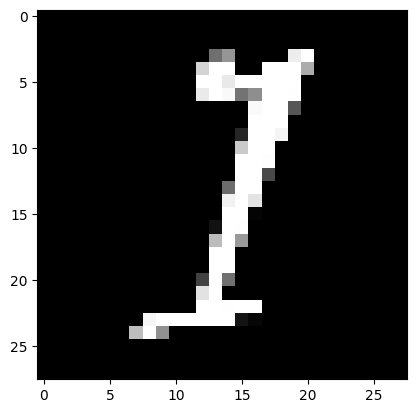

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1


In [38]:
i = 89
image = xtest[i].reshape((28,28)).astype('float32')
plt.imshow(image, cmap='Greys')
plt.show()
image = xtest[i].reshape((1, 784)).astype('float32')
prediction = model.predict(image)
print(prediction.argmax())

In [40]:
df[0].shape

(784,)

In [44]:
te = cv2.imread('Data/img001-00001.png')

In [48]:
te.shape

(128, 128, 3)

In [50]:
xtest[1].shape

(784,)